<a href="https://colab.research.google.com/github/nishchaypawar19/-Food-Delivery-Time-Prediction/blob/main/%22Water_Quality_Safety_Classification_Model%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score
from io import StringIO
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/content/water_quality_dataset.csv')
df.head()

,pH,Dissolved_Oxygen_mgL,Turbidity_NTU,Total_Dissolved_Solids_mgL,Nitrate_mgL,Phosphate_mgL,Temperature_C,Heavy_Metals_ppm,Safe_for_Humans,Safe_for_Animals,Safe_for_Plants
0,6.81,5.14,57.20,989.97,36.01,3.74,24.6,0.037,Unsafe,Safe,Unsafe
1,8.83,4.96,80.54,299.96,34.36,3.33,7.4,0.045,Unsafe,Safe,Unsafe
2,8.06,12.88,76.02,1314.97,4.79,1.76,12.3,0.326,Unsafe,Safe,Safe
3,7.60,4.99,15.39,939.02,46.13,6.07,28.2,0.243,Unsafe,Safe,Unsafe
4,6.05,5.26,14.92,277.95,28.42,4.77,20.9,0.395,Unsafe,Safe,Safe


In [3]:
df.isnull().sum()

,0
pH,0
Dissolved_Oxygen_mgL,0
Turbidity_NTU,0
Total_Dissolved_Solids_mgL,0
Nitrate_mgL,0
Phosphate_mgL,0
Temperature_C,0
Heavy_Metals_ppm,0
Safe_for_Humans,0
Safe_for_Animals,0


In [4]:
df.describe()

,pH,Dissolved_Oxygen_mgL,Turbidity_NTU,Total_Dissolved_Solids_mgL,Nitrate_mgL,Phosphate_mgL,Temperature_C,Heavy_Metals_ppm
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,7.245190,7.956515,49.628485,757.367535,24.582345,5.054725,19.864500,0.248977
std,1.022689,3.463012,28.794033,416.605799,14.108505,2.912757,8.725455,0.145142
min,5.510000,2.000000,0.000000,50.350000,0.000000,0.000000,5.000000,0.000000
25%,6.330000,5.010000,24.697500,397.032500,12.662500,2.530000,12.100000,0.122000
50%,7.280000,7.910000,49.150000,752.090000,24.335000,5.030000,19.600000,0.248000
75%,8.130000,10.982500,73.987500,1118.842500,36.480000,7.630000,27.600000,0.380000
max,9.000000,13.990000,99.940000,1499.220000,49.980000,10.000000,35.000000,0.500000


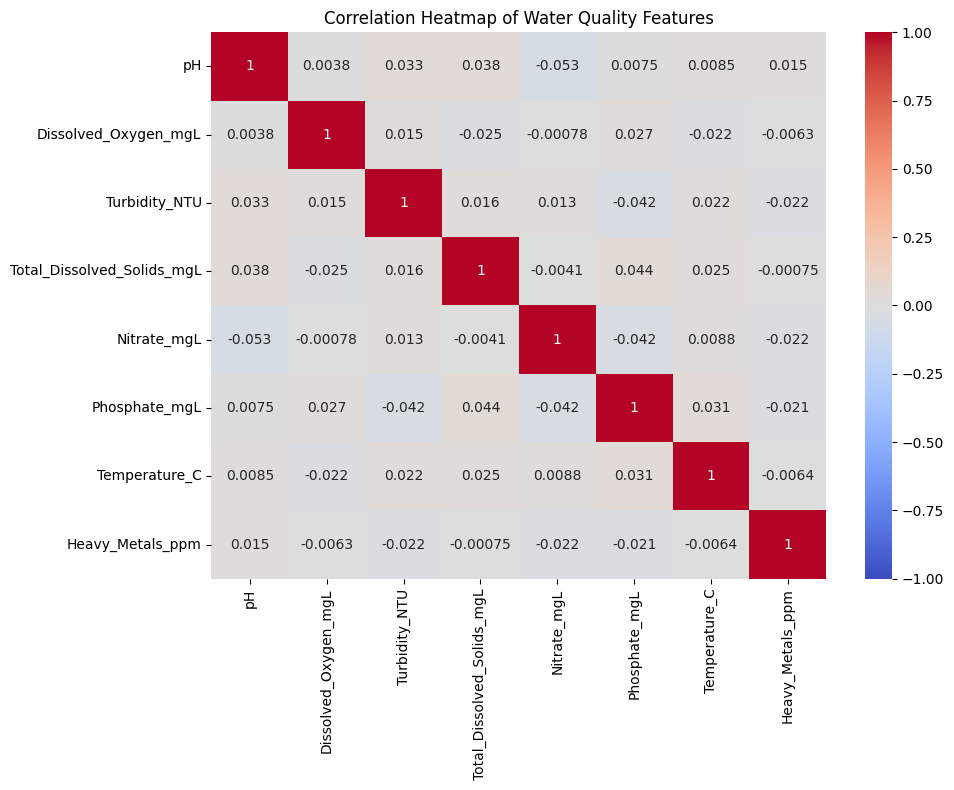

In [12]:
# Visualization 1: Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df[features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Water Quality Features')
plt.tight_layout()
plt.show()

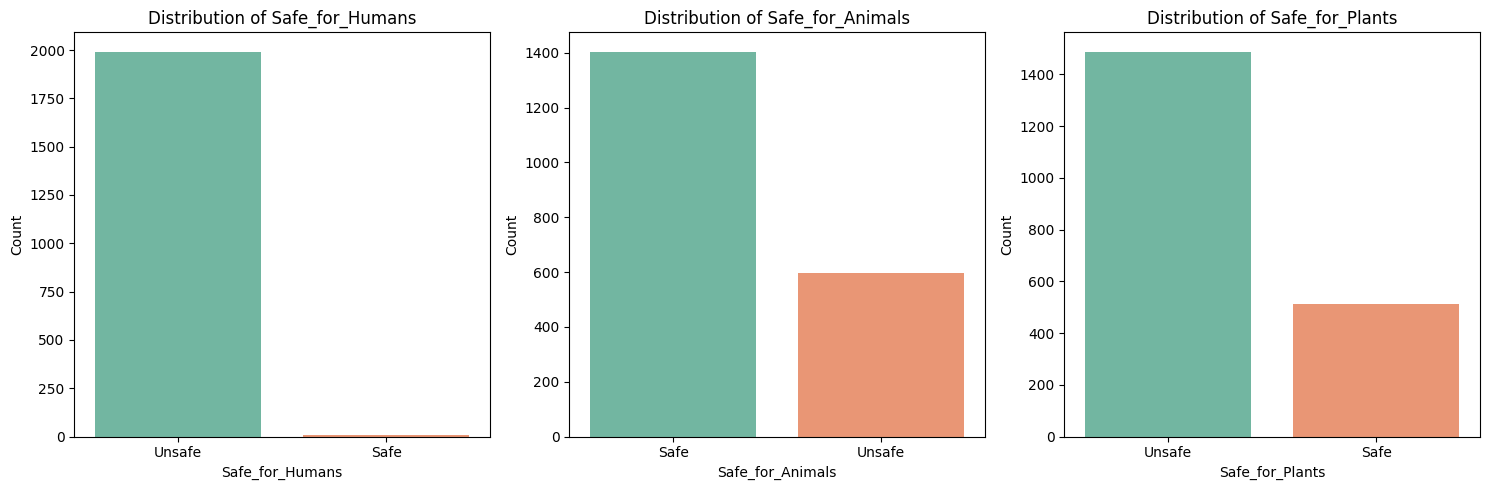

In [13]:
# Visualization 2: Bar Charts for Label Distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(targets):
    sns.countplot(x=col, data=df, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

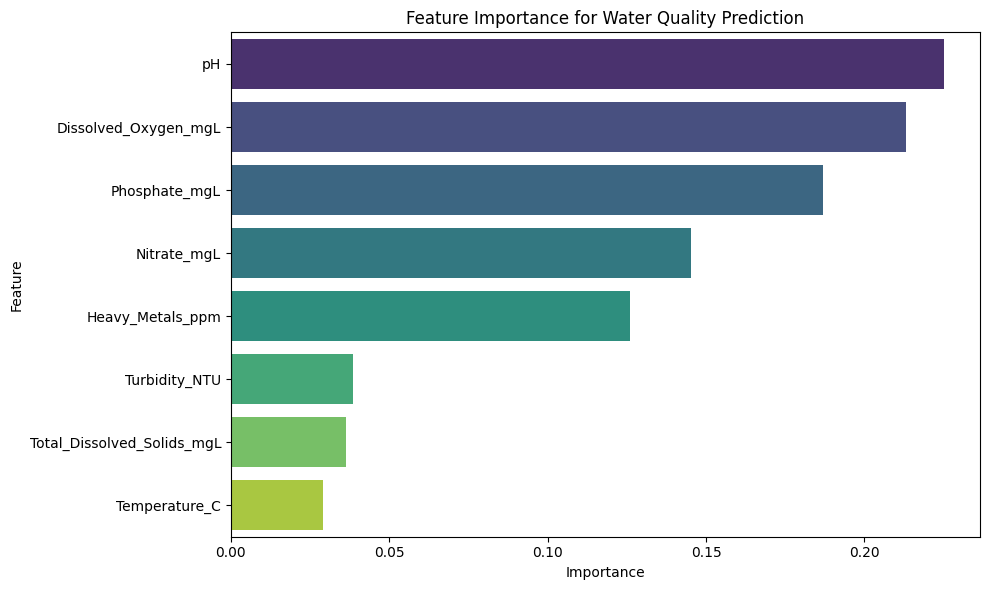

In [14]:
# Visualization 3: Feature Importance Plot
# Average feature importances across all target variables
feature_importances = np.mean([est.feature_importances_ for est in model.estimators_], axis=0)
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance for Water Quality Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [5]:
# Features and targets
features = ['pH', 'Dissolved_Oxygen_mgL', 'Turbidity_NTU', 'Total_Dissolved_Solids_mgL',
            'Nitrate_mgL', 'Phosphate_mgL', 'Temperature_C', 'Heavy_Metals_ppm']
X = df[features]
targets = ['Safe_for_Humans', 'Safe_for_Animals', 'Safe_for_Plants']
y = df[targets]

In [8]:
# Encode the labels (Safe/Unsafe to 1/0)
label_encoders = {}
for col in targets:
    le = LabelEncoder()
    y[col] = le.fit_transform(y[col])
    label_encoders[col] = le

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Train a multi-output classifier using RandomForest
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
model = MultiOutputClassifier(base_model)
model.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

In [11]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluate
for i, col in enumerate(targets):
    print(f"Classification report for {col}:")
    print(classification_report(y_test.iloc[:, i], y_pred[:, i]))
    print(f"Accuracy for {col}: {accuracy_score(y_test.iloc[:, i], y_pred[:, i])}\n")

Classification report for Safe_for_Humans:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00       399

    accuracy                           1.00       400
   macro avg       0.50      0.50      0.50       400
weighted avg       1.00      1.00      1.00       400

Accuracy for Safe_for_Humans: 0.9975

Classification report for Safe_for_Animals:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       282
           1       1.00      1.00      1.00       118

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Accuracy for Safe_for_Animals: 1.0

Classification report for Safe_for_Plants:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00

In [21]:
# Example new water quality sample
new_data = pd.DataFrame([
    {
        'pH': 7.2,
        'Dissolved_Oxygen_mgL': 6.5,
        'Turbidity_NTU': 30.0,
        'Total_Dissolved_Solids_mgL': 500.0,
        'Nitrate_mgL': 20.0,
        'Phosphate_mgL': 2.5,
        'Temperature_C': 22.0,
        'Heavy_Metals_ppm': 0.05
    },
    {
        'pH': 8.8,
        'Dissolved_Oxygen_mgL': 4.5,
        'Turbidity_NTU': 70.0,
        'Total_Dissolved_Solids_mgL': 1200.0,
        'Nitrate_mgL': 40.0,
        'Phosphate_mgL': 5.0,
        'Temperature_C': 28.0,
        'Heavy_Metals_ppm': 0.3
    }
])

# Predictions
new_pred = model.predict(new_data)

# Decode labels
decoded_preds = []
for row in new_pred:
    decoded_row = {}
    for i, col in enumerate(targets):
        decoded_row[col] = label_encoders[col].inverse_transform([row[i]])[0]
    decoded_preds.append(decoded_row)

pred_df = pd.DataFrame(decoded_preds)
print("Predictions on new data:")
print(pred_df)




Predictions on new data:
   Safe_for_Humans  Safe_for_Animals  Safe_for_Plants
0                1                 0                0
1                1                 0                1


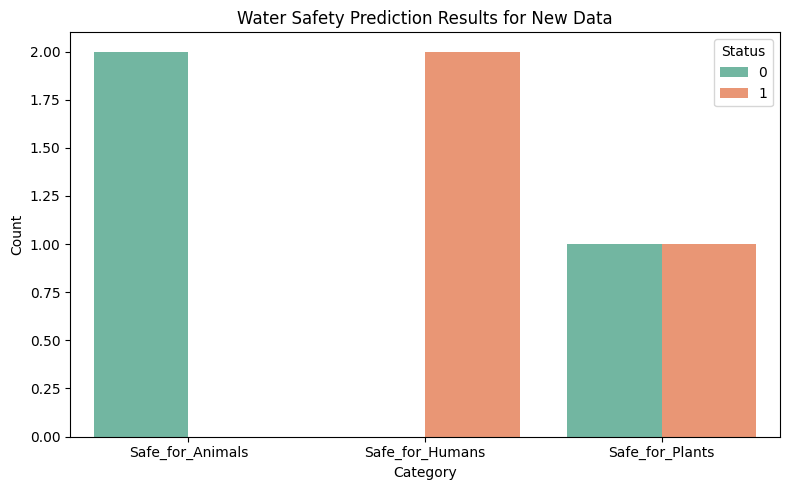

In [22]:
#  Visualization: Bar Chart of Predictions

plt.figure(figsize=(8, 5))
pred_counts = pred_df.melt(var_name="Category", value_name="Status") \
                    .groupby(["Category", "Status"]).size().reset_index(name="Count")

sns.barplot(x="Category", y="Count", hue="Status", data=pred_counts, palette="Set2")
plt.title("Water Safety Prediction Results for New Data")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Status")
plt.tight_layout()
plt.show()